<h2>ID5059 - P01</h2>
<h3>Student id - 200028225</h3>
<h3>5th March 2021</h3>

<h4>Creating the subsample of the original data</h4>

In [1]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import cross_val_score

In [2]:
main_file = pd.read_csv("pp-complete.csv", header=None) # Load the whole dataset
main_file[1:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09 00:00,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31 00:00,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04 00:00,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22 00:00,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A
5,{F0D1E8DA-C00D-467A-A41C-42C5378DB6E0},45450,1995-02-28 00:00,S42 5GA,S,Y,F,109,NaN,ELVASTON ROAD,NORTH WINGFIELD,CHESTERFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A
6,{7DAC48DA-D479-4922-86B0-42C5580DFC67},96000,1995-10-27 00:00,KT17 2DU,S,N,F,82,NaN,KINGSTON ROAD,EPSOM,EPSOM,EPSOM AND EWELL,SURREY,A,A
7,{10E5F080-7AF3-4982-AAEF-42C55DC955FC},30000,1995-11-28 00:00,WS10 9LD,S,N,F,66,NaN,HILL STREET,WEDNESBURY,WEDNESBURY,WALSALL,WEST MIDLANDS,A,A
8,{B365B080-3670-4955-80F8-42C55F081143},425000,1995-03-31 00:00,KT11 1HP,D,N,F,18,NaN,BRUNSWICK GROVE,COBHAM,COBHAM,ELMBRIDGE,SURREY,A,A
9,{7648EFE5-67A0-4728-B5DE-42C565DA1D28},89995,1995-06-30 00:00,WF6 2TT,D,Y,F,8,NaN,SHAW AVENUE,NORMANTON,NORMANTON,WAKEFIELD,WEST YORKSHIRE,A,A


In [3]:
#Get the required column from dataset and rename them
required_data = main_file[[1,2,4,6,11]]
required_data_column = required_data.rename(columns={1: 'price',2: 'year',4:'propertyType',6:'estateType',11:'townOrCity'})
required_data_column

,price,year,propertyType,estateType,townOrCity
0,18500,1995-01-31 00:00,F,L,TORQUAY
1,73450,1995-10-09 00:00,D,F,LIVERPOOL
2,59000,1995-03-31 00:00,D,F,POOLE
3,31000,1995-12-04 00:00,D,F,WOODBRIDGE
4,95000,1995-09-22 00:00,D,F,LICHFIELD
...,...,...,...,...,...
25744775,450000,2020-09-14 00:00,D,F,KNUTSFORD
25744776,232500,2020-08-27 00:00,D,F,NORTHWICH
25744777,190000,2020-07-15 00:00,S,F,WIRRAL
25744778,150000,2020-08-17 00:00,T,F,CREWE


In [4]:
# split the year column and sperate only year from it 
yearOfProperty = required_data_column['year'].str.split("-", expand = True) 
required_data_column.drop(columns=['year'])
required_data_column['year'] = yearOfProperty[0]
required_data_column

,price,year,propertyType,estateType,townOrCity
0,18500,1995,F,L,TORQUAY
1,73450,1995,D,F,LIVERPOOL
2,59000,1995,D,F,POOLE
3,31000,1995,D,F,WOODBRIDGE
4,95000,1995,D,F,LICHFIELD
...,...,...,...,...,...
25744775,450000,2020,D,F,KNUTSFORD
25744776,232500,2020,D,F,NORTHWICH
25744777,190000,2020,S,F,WIRRAL
25744778,150000,2020,T,F,CREWE


In [5]:
# to check the all unique years from main dataset
years = required_data_column.year.unique() 
years

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'], dtype=object)

In [6]:
#to check how many observation each year has in main dataset
for each in years:
    eachYeardata = required_data_column[required_data_column['year'] == each]
    print(eachYeardata['year'].value_counts())

1995    796676
Name: year, dtype: int64
1996    964802
Name: year, dtype: int64
1997    1093897
Name: year, dtype: int64
1998    1049978
Name: year, dtype: int64
1999    1194271
Name: year, dtype: int64
2000    1128770
Name: year, dtype: int64
2001    1245245
Name: year, dtype: int64
2002    1351145
Name: year, dtype: int64
2003    1234889
Name: year, dtype: int64
2004    1231378
Name: year, dtype: int64
2005    1060944
Name: year, dtype: int64
2006    1325511
Name: year, dtype: int64
2007    1271825
Name: year, dtype: int64
2008    649383
Name: year, dtype: int64
2009    625054
Name: year, dtype: int64
2010    663056
Name: year, dtype: int64
2011    660945
Name: year, dtype: int64
2012    668581
Name: year, dtype: int64
2013    810619
Name: year, dtype: int64
2014    984243
Name: year, dtype: int64
2015    1009927
Name: year, dtype: int64
2016    1044579
Name: year, dtype: int64
2017    1064133
Name: year, dtype: int64
2018    1032256
Name: year, dtype: int64
2019    998731
Name: year

In [7]:
# Take 3% of data from each year and craete a subsample 
# so that subsample has exact same distribution of observation per year as main dataset.

results=pd.DataFrame()

for each in years:
    eachYeardata = required_data_column[required_data_column['year'] == each]
    eachSample = eachYeardata.sample(frac =0.03) 
    print("Year: ", each)
    print(eachSample.shape)
    results = results.append(eachSample,ignore_index=True)   
    

Year:  1995
(23900, 5)
Year:  1996
(28944, 5)
Year:  1997
(32817, 5)
Year:  1998
(31499, 5)
Year:  1999
(35828, 5)
Year:  2000
(33863, 5)
Year:  2001
(37357, 5)
Year:  2002
(40534, 5)
Year:  2003
(37047, 5)
Year:  2004
(36941, 5)
Year:  2005
(31828, 5)
Year:  2006
(39765, 5)
Year:  2007
(38155, 5)
Year:  2008
(19481, 5)
Year:  2009
(18752, 5)
Year:  2010
(19892, 5)
Year:  2011
(19828, 5)
Year:  2012
(20057, 5)
Year:  2013
(24319, 5)
Year:  2014
(29527, 5)
Year:  2015
(30298, 5)
Year:  2016
(31337, 5)
Year:  2017
(31924, 5)
Year:  2018
(30968, 5)
Year:  2019
(29962, 5)
Year:  2020
(17518, 5)


In [8]:
#to make sure we have all years data in subsample
results['year'].value_counts()

2002    40534
2006    39765
2007    38155
2001    37357
2003    37047
2004    36941
1999    35828
2000    33863
1997    32817
2017    31924
2005    31828
1998    31499
2016    31337
2018    30968
2015    30298
2019    29962
2014    29527
1996    28944
2013    24319
1995    23900
2012    20057
2010    19892
2011    19828
2008    19481
2009    18752
2020    17518
Name: year, dtype: int64

In [9]:
results.shape

(772341, 5)

In [10]:
#to store the subsample into CSV file 
results.to_csv(r'subSampleData.csv', index = False)

Now the whole dataset has been converted into subsampled and stored in the above file. Now we can use that dataset for further analysis.

<h3>Step 1 - Frame the problem</h3>

We have regression problem. The problem is to predit the price that was paid from at estate type, the property type and whether or not teh property is in London features.

<h3>Step 2 - Get the data</h3>

In [11]:
subSampled = pd.read_csv("subSampleData.csv")

In [12]:
subSampled.shape

(772341, 5)

In [13]:
subSampled[1:10]

,price,year,propertyType,estateType,townOrCity
1,55500,1995,D,F,MORPETH
2,40000,1995,T,F,EXETER
3,177500,1995,D,F,BUCKINGHAM
4,42000,1995,T,F,MACCLESFIELD
5,46250,1995,S,F,BRADFORD
6,165000,1995,D,F,MILTON KEYNES
7,37595,1995,D,F,LIVERPOOL
8,50000,1995,T,F,THORNTON HEATH
9,122000,1995,S,F,TUNBRIDGE WELLS


<h3>Step 3 and 4 - Explore and prepare the data</h3>

<h3>Spliting the training and testing data</h3>

In [14]:
trainingData = subSampled[subSampled['year'] < 2017] 
trainingData['year'].value_counts() 

2002    40534
2006    39765
2007    38155
2001    37357
2003    37047
2004    36941
1999    35828
2000    33863
1997    32817
2005    31828
1998    31499
2016    31337
2015    30298
2014    29527
1996    28944
2013    24319
1995    23900
2012    20057
2010    19892
2011    19828
2008    19481
2009    18752
Name: year, dtype: int64

In [15]:
testingData = subSampled[subSampled['year'] >= 2017] 
testingData['year'].value_counts() 

2017    31924
2018    30968
2019    29962
2020    17518
Name: year, dtype: int64

In [16]:
len(trainingData) + len(testingData) - len(subSampled)

0

In [17]:
finalData = trainingData.copy()
finalData.shape

(661969, 5)

In [18]:
finalData[1:6]

,price,year,propertyType,estateType,townOrCity
1,55500,1995,D,F,MORPETH
2,40000,1995,T,F,EXETER
3,177500,1995,D,F,BUCKINGHAM
4,42000,1995,T,F,MACCLESFIELD
5,46250,1995,S,F,BRADFORD


In [19]:
finalData['townOrCity'].value_counts()

LONDON              52930
MANCHESTER          10607
BRISTOL              9940
BIRMINGHAM           9824
NOTTINGHAM           8580
                    ...  
NEWCASTLETON            1
LLANNERCH-Y-MEDD        1
WARLEY                  1
BILLINGHURST            1
MARIANGLAS              1
Name: townOrCity, Length: 1164, dtype: int64

<h3>Handeling numeric and categorical variable</h3>

In [20]:
def binaryEncoding(dataColumn, value):
    return np.where(dataColumn != value, '0', '1')

#to replace the value 1 where location is london else 0.
finalData['inLondonOrNot'] = binaryEncoding(finalData['townOrCity'], 'LONDON')

In [21]:
pd.DataFrame(finalData).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661969 entries, 0 to 661968
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          661969 non-null  int64 
 1   year           661969 non-null  int64 
 2   propertyType   661969 non-null  object
 3   estateType     661969 non-null  object
 4   townOrCity     661969 non-null  object
 5   inLondonOrNot  661969 non-null  object
dtypes: int64(2), object(4)
memory usage: 35.4+ MB


In [22]:
finalData['inLondonOrNot'].value_counts()

0    609039
1     52930
Name: inLondonOrNot, dtype: int64

In [23]:
finalData['estateType'].value_counts()

F    505472
L    156485
U        12
Name: estateType, dtype: int64

In [24]:
finalData['propertyType'].value_counts()

T    203690
S    182859
D    152386
F    120534
O      2500
Name: propertyType, dtype: int64

In [25]:
def categoricalEncoding(dataColumn , prefixValue):
    return pd.get_dummies(dataColumn, prefix = prefixValue)
    
#One hot encoding for propertyType attribute
dummiesColums = categoricalEncoding(finalData.propertyType, 'propertyType')

In [26]:
encodedData = pd.concat([finalData, dummiesColums], axis=1)

In [27]:
encodedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661969 entries, 0 to 661968
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   price           661969 non-null  int64 
 1   year            661969 non-null  int64 
 2   propertyType    661969 non-null  object
 3   estateType      661969 non-null  object
 4   townOrCity      661969 non-null  object
 5   inLondonOrNot   661969 non-null  object
 6   propertyType_D  661969 non-null  uint8 
 7   propertyType_F  661969 non-null  uint8 
 8   propertyType_O  661969 non-null  uint8 
 9   propertyType_S  661969 non-null  uint8 
 10  propertyType_T  661969 non-null  uint8 
dtypes: int64(2), object(4), uint8(5)
memory usage: 38.5+ MB


In [28]:
encodedData['estateType'].value_counts()

F    505472
L    156485
U        12
Name: estateType, dtype: int64

We will remove all observation in which estateType is 'U'.  reasons the type 'U' is unidentify.

In [29]:
dropEstateTypeU = encodedData[encodedData['estateType'] != 'U']

In [30]:
dropEstateTypeU['estateType'].value_counts()

F    505472
L    156485
Name: estateType, dtype: int64

In [31]:
encodedEstateType = categoricalEncoding(dropEstateTypeU.estateType, 'estateType')
finalEncodedData = pd.concat([dropEstateTypeU, encodedEstateType], axis=1)

In [32]:
#Final encoded data
finalEncodedData

,price,year,propertyType,estateType,townOrCity,inLondonOrNot,propertyType_D,propertyType_F,propertyType_O,propertyType_S,propertyType_T,estateType_F,estateType_L
0,250000,1995,D,F,PETERBOROUGH,0,1,0,0,0,0,1,0
1,55500,1995,D,F,MORPETH,0,1,0,0,0,0,1,0
2,40000,1995,T,F,EXETER,0,0,0,0,0,1,1,0
3,177500,1995,D,F,BUCKINGHAM,0,1,0,0,0,0,1,0
4,42000,1995,T,F,MACCLESFIELD,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661964,189950,2016,T,F,NOTTINGHAM,0,0,0,0,0,1,1,0
661965,186000,2016,S,F,YORK,0,0,0,0,1,0,1,0
661966,149000,2016,S,F,GOSPORT,0,0,0,0,1,0,1,0
661967,77500,2016,F,L,LEICESTER,0,0,1,0,0,0,0,1


In [33]:
# removing the columns which don't required 
preapredData = finalEncodedData.drop(columns=['year','propertyType','estateType','townOrCity'])

In [34]:
preapredData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661957 entries, 0 to 661968
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   price           661957 non-null  int64 
 1   inLondonOrNot   661957 non-null  object
 2   propertyType_D  661957 non-null  uint8 
 3   propertyType_F  661957 non-null  uint8 
 4   propertyType_O  661957 non-null  uint8 
 5   propertyType_S  661957 non-null  uint8 
 6   propertyType_T  661957 non-null  uint8 
 7   estateType_F    661957 non-null  uint8 
 8   estateType_L    661957 non-null  uint8 
dtypes: int64(1), object(1), uint8(7)
memory usage: 19.6+ MB


In [35]:
#converting all columns type to intergers
preapredDataInt = preapredData.astype(int)

In [36]:
preapredDataInt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661957 entries, 0 to 661968
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   price           661957 non-null  int64
 1   inLondonOrNot   661957 non-null  int64
 2   propertyType_D  661957 non-null  int64
 3   propertyType_F  661957 non-null  int64
 4   propertyType_O  661957 non-null  int64
 5   propertyType_S  661957 non-null  int64
 6   propertyType_T  661957 non-null  int64
 7   estateType_F    661957 non-null  int64
 8   estateType_L    661957 non-null  int64
dtypes: int64(9)
memory usage: 50.5 MB


In [37]:
#checking missing values in columns
preapredDataInt.isnull().sum()

price             0
inLondonOrNot     0
propertyType_D    0
propertyType_F    0
propertyType_O    0
propertyType_S    0
propertyType_T    0
estateType_F      0
estateType_L      0
dtype: int64

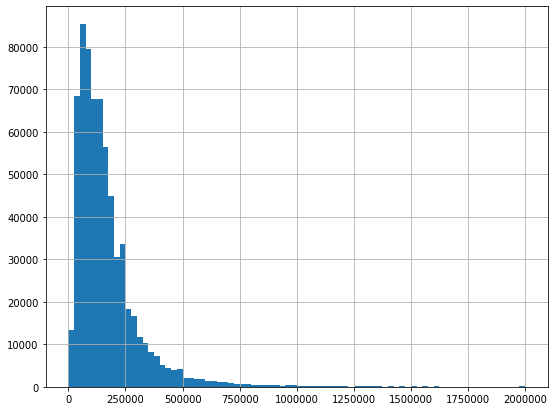

In [38]:
#ploting the histogram of price column
preapredDataInt["price"].hist(bins=80, range=[0, 2000000],figsize=(9,7) )


In [39]:
#to Check correlation
correlationMatrix = preapredDataInt.corr()
correlationMatrix

,price,inLondonOrNot,propertyType_D,propertyType_F,propertyType_O,propertyType_S,propertyType_T,estateType_F,estateType_L
price,1.000000,0.132760,0.091976,-0.003672,0.202006,-0.043933,-0.065103,0.014825,-0.014825
inLondonOrNot,0.132760,1.000000,-0.148893,0.337810,0.005820,-0.131020,-0.020498,-0.278170,0.278170
propertyType_D,0.091976,-0.148893,1.000000,-0.258015,-0.033670,-0.337837,-0.364570,0.255731,-0.255731
propertyType_F,-0.003672,0.337810,-0.258015,1.000000,-0.029051,-0.291492,-0.314557,-0.819518,0.819518
propertyType_O,0.202006,0.005820,-0.033670,-0.029051,1.000000,-0.038038,-0.041048,-0.003362,0.003362
propertyType_S,-0.043933,-0.131020,-0.337837,-0.291492,-0.038038,1.000000,-0.411872,0.233909,-0.233909
propertyType_T,-0.065103,-0.020498,-0.364570,-0.314557,-0.041048,-0.411872,1.000000,0.225826,-0.225826
estateType_F,0.014825,-0.278170,0.255731,-0.819518,-0.003362,0.233909,0.225826,1.000000,-1.000000
estateType_L,-0.014825,0.278170,-0.255731,0.819518,0.003362,-0.233909,-0.225826,-1.000000,1.000000


In [40]:
correlationMatrix['price'].sort_values(ascending = False)

price             1.000000
propertyType_O    0.202006
inLondonOrNot     0.132760
propertyType_D    0.091976
estateType_F      0.014825
propertyType_F   -0.003672
estateType_L     -0.014825
propertyType_S   -0.043933
propertyType_T   -0.065103
Name: price, dtype: float64

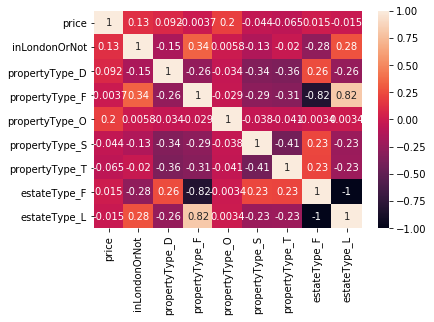

In [41]:
#heat map for correlation matrix
sn.heatmap(correlationMatrix, annot=True)
plt.show()

<h3>Step 5 - Explore Models</h3>

<h5>Model 1: Linear Regression</h5>

In [42]:
#seprated the labels
labels_y = preapredDataInt['price'].copy()

In [43]:
#data with only features
preapredDataInt.drop("price", axis=1, inplace=True)

In [44]:
labels_y

0         250000
1          55500
2          40000
3         177500
4          42000
           ...  
661964    189950
661965    186000
661966    149000
661967     77500
661968    250000
Name: price, Length: 661957, dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()
linearReg.fit(preapredDataInt, labels_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#making predication on 20 raw observations from training data
someData = trainingData.iloc[:20]
someLabels = labels_y.iloc[:20]
someDropEstateTypeU = someData[someData['estateType'] != 'U']

someDropEstateTypeU['inLondonOrNot'] = binaryEncoding(someDropEstateTypeU['townOrCity'], 'LONDON')

cat_encoding_propertyType = categoricalEncoding(someDropEstateTypeU.propertyType, 'propertyType')
cat_encoding_estateType = categoricalEncoding(someDropEstateTypeU.estateType, 'estateType')

someCategoricalEncoding = pd.concat([cat_encoding_propertyType, cat_encoding_estateType], axis=1)

some_encoded_data = pd.concat([someDropEstateTypeU, someCategoricalEncoding], axis=1)

somepreapredData = some_encoded_data.drop(columns=['year','propertyType','estateType','townOrCity'])



In [52]:
some_predictions = linearReg.predict(somepreapredData).round()

print("Predictions:", some_predictions)
print("Labels:", list(someLabels))

Predictions: [ 6.07690523e+10  1.34908405e+10  9.72314733e+09  4.31460685e+10
  1.02092986e+10  1.12423924e+10  4.01076230e+10  9.13857122e+09
  1.21539037e+10  2.96553721e+10 -3.68664986e+14  1.28831306e+10
  8.75084477e+09  2.55230862e+10 -3.68665594e+14  2.16217207e+10
  8.63068431e+09  3.03845766e+10  5.46932365e+09  1.45846809e+10]
Labels: [250000, 55500, 40000, 177500, 42000, 46250, 165000, 37595, 50000, 122000, 42500, 53000, 36000, 105000, 40000, 88950, 35500, 125000, 22500, 60000]


In [53]:
#measure the entire training data's root-mean-squared-error (RMSE)
from sklearn.metrics import mean_squared_error

predictions = linearReg.predict(preapredDataInt)
linearRegMSE = mean_squared_error(labels_y, predictions)
linnearRMSE = np.sqrt(linearRegMSE)
np.round(linnearRMSE)

403433.0

In [54]:
labels_y.median()

130000.0

In [55]:
np.round(linnearRMSE)/labels_y.median() 

3.1033307692307694

In [56]:
%%time
scores = cross_val_score(linearReg, preapredDataInt, labels_y,
                         scoring="neg_mean_squared_error", cv=5) #5 fold cross validation to check the errors
LinearRMSEscores = np.sqrt(-scores)
print('Scores(): ', np.round(LinearRMSEscores))
print('Mean of RMSE scores: ', np.round(LinearRMSEscores.mean()))
print('Standard Deviation of RMSE scores: ', np.round(LinearRMSEscores.std()))



Scores():  [151372. 131773. 132844. 209916. 874429.]
Mean of RMSE scores:  300067.0
Standard Deviation of RMSE scores:  288588.0
CPU times: user 1.05 s, sys: 156 ms, total: 1.21 s
Wall time: 839 ms


<h5>Model 2: Decision Tree</h5>

In [57]:
from sklearn.tree import DecisionTreeRegressor

DecisiontreeReg = DecisionTreeRegressor(random_state=42)
DecisiontreeReg.fit(preapredDataInt, labels_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [58]:
#making predication on 20 raw observations from training data
some_predictions_tree = DecisiontreeReg.predict(somepreapredData).round()

print("Predictions:", some_predictions_tree)
print("Labels:", list(someLabels))

Predictions: [ 347926.  347926.  392155.  347926.  392155.  433465.  347926.  347926.
  392155.  433465. 4140442.  392155.  392155.  433465. 4140442.  347926.
 4140442.  392155.  392155.  347926.]
Labels: [250000, 55500, 40000, 177500, 42000, 46250, 165000, 37595, 50000, 122000, 42500, 53000, 36000, 105000, 40000, 88950, 35500, 125000, 22500, 60000]


In [59]:
%%time

TreePredictions = DecisiontreeReg.predict(preapredDataInt) #measuring the entire training data's RMSE
treeMSE = mean_squared_error(labels_y, TreePredictions)
treeRMSE = np.sqrt(treeMSE)
treeRMSE

CPU times: user 41 ms, sys: 6.02 ms, total: 47 ms
Wall time: 48.1 ms


397189.54449704854

In [60]:
np.round(treeRMSE)/ labels_y.median() 

3.0553076923076925

In [61]:
%%time

from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisiontreeReg, preapredDataInt, labels_y,
                         scoring="neg_mean_squared_error", cv=5) #5 fold cross validation to check the errors
treeRMSEscores = np.sqrt(-scores)
print('Scores: ', np.round(treeRMSEscores))
print('Mean of RMSE scores: ', np.round(treeRMSEscores.mean()))
print('Standard Deviation of RMSE scores: ', np.round(treeRMSEscores.std()))



Scores:  [151063. 129977. 130829. 208628. 873823.]
Mean of RMSE scores:  298864.0
Standard Deviation of RMSE scores:  288903.0
CPU times: user 1.28 s, sys: 78.3 ms, total: 1.36 s
Wall time: 1.5 s



<h5>Model 3: Random Forest</h5>

In [62]:
%%time
from sklearn.ensemble import RandomForestRegressor

RandomForestReg = RandomForestRegressor(n_estimators=100, random_state=42)
RandomForestReg.fit(preapredDataInt, labels_y)

RandomForestPredictions = RandomForestReg.predict(preapredDataInt)
RandomForestMSE = mean_squared_error(labels_y, RandomForestPredictions)
RandomForestRMSE = np.sqrt(RandomForestMSE) #measuring the entire training data's RMSE
RandomForestRMSE




CPU times: user 28.5 s, sys: 538 ms, total: 29 s
Wall time: 31.7 s


397217.6665434965

In [63]:
#making predication on 20 raw observations from training data
some_predictions_forest = RandomForestReg.predict(somepreapredData).round()

print("Predictions:", some_predictions_forest)
print("Labels:", list(someLabels))

Predictions: [ 349664.  349664.  391943.  349664.  391943.  435306.  349664.  349664.
  391943.  435306. 3861978.  391943.  391943.  435306. 3861978.  349664.
 3861978.  391943.  391943.  349664.]
Labels: [250000, 55500, 40000, 177500, 42000, 46250, 165000, 37595, 50000, 122000, 42500, 53000, 36000, 105000, 40000, 88950, 35500, 125000, 22500, 60000]


In [64]:
%%time
#5 fold cross validation for Random Forest

forestScores = cross_val_score(RandomForestReg, preapredDataInt, labels_y,
                                scoring="neg_mean_squared_error", cv=5)
forestRMSEscores = np.sqrt(-forestScores)
print('Scores(): ', np.round(forestRMSEscores))
print('Mean of RMSE scores: ', np.round(forestRMSEscores.mean()))
print('Standard Deviation of RMSE scores: ', np.round(forestRMSEscores.std()))



Scores():  [151170. 130012. 130825. 208684. 873908.]
Mean of RMSE scores:  298920.0
Standard Deviation of RMSE scores:  288919.0
CPU times: user 1min 38s, sys: 1.38 s, total: 1min 40s
Wall time: 1min 48s


<h5>Model 4: LASSO Regression</h5>

In [65]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(0.1)
lasso_regression.fit(preapredDataInt, labels_y)

lasso_Predictions = lasso_regression.predict(preapredDataInt)
lasso_MSE = mean_squared_error(labels_y, lasso_Predictions)
lasso_RMSE = np.sqrt(lasso_MSE) #measuring the entire training data's RMSE
lasso_RMSE


403432.6812080369

In [66]:
#making predication on 20 raw observations from training data
some_predictions_lasso = lasso_regression.predict(somepreapredData).round()

print("Predictions:", some_predictions_lasso)
print("Labels:", list(someLabels))

Predictions: [6.07818222e+10 1.34936754e+10 9.72519052e+09 4.31551351e+10
 1.02114440e+10 1.12447550e+10 4.01160511e+10 9.14049148e+09
 1.21564577e+10 2.96616039e+10 1.03344948e+10 1.28858379e+10
 8.75268364e+09 2.55284497e+10 9.72667803e+09 2.16262641e+10
 8.63249768e+09 3.03909616e+10 5.47047294e+09 1.45877456e+10]
Labels: [250000, 55500, 40000, 177500, 42000, 46250, 165000, 37595, 50000, 122000, 42500, 53000, 36000, 105000, 40000, 88950, 35500, 125000, 22500, 60000]


In [67]:
%%time
#cross validation for Lasso regression

lassoScores = cross_val_score(lasso_regression, preapredDataInt, labels_y,
                                scoring="neg_mean_squared_error", cv=5)
lassoRMSEscores = np.sqrt(-lassoScores)
print('Scores(): ', np.round(lassoRMSEscores))
print('Mean of RMSE scores: ', np.round(lassoRMSEscores.mean()))
print('Standard Deviation of RMSE scores: ', np.round(lassoRMSEscores.std()))

Scores():  [151350. 131717. 132865. 209922. 874492.]
Mean of RMSE scores:  300069.0
Standard Deviation of RMSE scores:  288619.0
CPU times: user 5.6 s, sys: 156 ms, total: 5.76 s
Wall time: 3.64 s


<h5>Model 5: Elastic Net Regression</h5>

In [68]:
from sklearn.linear_model import ElasticNet
ElasticNet_regression = ElasticNet(0.6)
ElasticNet_regression.fit(preapredDataInt, labels_y)

ElasticNet_Predictions = ElasticNet_regression.predict(preapredDataInt)
ElasticNet_MSE = mean_squared_error(labels_y, ElasticNet_Predictions)
ElasticNet_RMSE = np.sqrt(ElasticNet_MSE) #measuring the entire training data's RMSE
ElasticNet_RMSE

415792.06369834335

In [69]:
#making predication on 20 raw observations from training data
some_predictions_ElasticNet = ElasticNet_regression.predict(somepreapredData).round()

print("Predictions:", some_predictions_ElasticNet)
print("Labels:", list(someLabels))

Predictions: [1.05399097e+10 2.33999957e+09 1.68651485e+09 7.48338796e+09
 1.77083270e+09 1.95001565e+09 6.95640144e+09 1.58514408e+09
 2.10810407e+09 5.14355394e+09 1.79196949e+09 2.23458083e+09
 1.51787917e+09 4.42685227e+09 1.68657218e+09 3.75021548e+09
 1.49682893e+09 5.27002316e+09 9.48733732e+08 2.52971471e+09]
Labels: [250000, 55500, 40000, 177500, 42000, 46250, 165000, 37595, 50000, 122000, 42500, 53000, 36000, 105000, 40000, 88950, 35500, 125000, 22500, 60000]


In [70]:
%%time
#cross validation for Elastic Net 

ElasticNetScores = cross_val_score(ElasticNet_regression, preapredDataInt, labels_y,
                                scoring="neg_mean_squared_error", cv=5)
ElasticNetRMSEscores = np.sqrt(-ElasticNetScores)
print('Scores(): ', np.round(ElasticNetRMSEscores))
print('Mean of RMSE scores: ', np.round(ElasticNetRMSEscores.mean()))
print('Standard Deviation of RMSE scores: ', np.round(ElasticNetRMSEscores.std()))

Scores():  [140939. 133005. 138183. 219321. 881534.]
Mean of RMSE scores:  302596.0
Standard Deviation of RMSE scores:  291214.0
CPU times: user 2.02 s, sys: 116 ms, total: 2.13 s
Wall time: 1.21 s


<h5>Model 6: Ridge Regression</h5>

In [71]:
from sklearn.linear_model import Ridge

Ridge_regression = Ridge(1.0)
Ridge_regression.fit(preapredDataInt, labels_y)

Ridge_Predictions = Ridge_regression.predict(preapredDataInt)
Ridge_MSE = mean_squared_error(labels_y, Ridge_Predictions)
Ridge_RMSE = np.sqrt(Ridge_MSE) #measuring the entire training data's RMSE
Ridge_RMSE

403432.68211201846

In [72]:
#making predication on 20 raw observations from training data
some_predictions_Ridge = Ridge_regression.predict(somepreapredData).round()

print("Predictions:", some_predictions_Ridge)
print("Labels:", list(someLabels))

Predictions: [6.07807741e+10 1.34934427e+10 9.72502282e+09 4.31543909e+10
 1.02112679e+10 1.12445611e+10 4.01153593e+10 9.14033387e+09
 1.21562481e+10 2.96610924e+10 1.03340150e+10 1.28856157e+10
 8.75253271e+09 2.55280095e+10 9.72620872e+09 2.16258912e+10
 8.63234843e+09 3.03904376e+10 5.47037861e+09 1.45874941e+10]
Labels: [250000, 55500, 40000, 177500, 42000, 46250, 165000, 37595, 50000, 122000, 42500, 53000, 36000, 105000, 40000, 88950, 35500, 125000, 22500, 60000]


In [73]:
%%time
#cross validation for Ridge Regression

RidgeNetScores = cross_val_score(Ridge_regression, preapredDataInt, labels_y,
                                scoring="neg_mean_squared_error", cv=5)
RidgeNetRMSEscores = np.sqrt(-RidgeNetScores)
print('Scores(): ', np.round(RidgeNetRMSEscores))
print('Mean of RMSE scores: ', np.round(RidgeNetRMSEscores.mean()))
print('Standard Deviation of RMSE scores: ', np.round(RidgeNetRMSEscores.std()))

Scores():  [151351. 131718. 132865. 209921. 874481.]
Mean of RMSE scores:  300067.0
Standard Deviation of RMSE scores:  288615.0
CPU times: user 649 ms, sys: 97.8 ms, total: 747 ms
Wall time: 489 ms


<h3>Step 6 - Fine tune models</h3>

Fine tune the decision tree model and random forest model, both have similar RMSE. which is bit lower compare to other models.

Fine tuning the decision tree model

In [74]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = [{'criterion': ["mse"],
              'max_depth': [3, 5, 10, 15],
              'max_features': [2 ,3, 4, 5]},
            {'random_state': [0, 1, 2, 3, 4], 
             'min_samples_split': [2, 3, 4]}    ]


treeReg = DecisionTreeRegressor(random_state=42)

grid_search_tree = GridSearchCV(treeReg, parameters, cv=5, scoring="neg_mean_squared_error")

grid_search_tree.fit(preapredDataInt, labels_y)



CPU times: user 31.4 s, sys: 1.42 s, total: 32.9 s
Wall time: 37 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['mse'], 'max_depth': [3, 5, 10, 15],
                          'max_features': [2, 3, 4, 5]},
                         {'min_samples_split': [2, 3, 4],
          

In [75]:
#error checking 
   
results = grid_search_tree.cv_results_

for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(-mean_score), params)

416872.4826255217 {'criterion': 'mse', 'max_depth': 3, 'max_features': 2}
416910.78740984487 {'criterion': 'mse', 'max_depth': 3, 'max_features': 3}
418366.287397653 {'criterion': 'mse', 'max_depth': 3, 'max_features': 4}
417938.25108668406 {'criterion': 'mse', 'max_depth': 3, 'max_features': 5}
417933.30028203357 {'criterion': 'mse', 'max_depth': 5, 'max_features': 2}
416518.489552115 {'criterion': 'mse', 'max_depth': 5, 'max_features': 3}
416820.7299505136 {'criterion': 'mse', 'max_depth': 5, 'max_features': 4}
416537.8919048416 {'criterion': 'mse', 'max_depth': 5, 'max_features': 5}
415595.20045512926 {'criterion': 'mse', 'max_depth': 10, 'max_features': 2}
415595.20045512926 {'criterion': 'mse', 'max_depth': 10, 'max_features': 3}
415673.64981525316 {'criterion': 'mse', 'max_depth': 10, 'max_features': 4}
415595.20045512926 {'criterion': 'mse', 'max_depth': 10, 'max_features': 5}
415595.20045512926 {'criterion': 'mse', 'max_depth': 15, 'max_features': 2}
415595.20045512926 {'criter

In [76]:
grid_search_tree.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Fine tuning the random forest model

In [77]:
%%time


forest_parameters = [{'n_estimators': [3, 10], 
                      'max_features': [2 ,3, 4, 5]},
                    {'bootstrap': [False], 
                     'n_estimators': [3, 10,30], 
                     'max_features': [3, 4, 5]},]


randomForestReg_ft = RandomForestRegressor(random_state=42)

grid_search_forest = GridSearchCV(randomForestReg_ft, 
                                forest_parameters, 
                                cv=5, 
                                scoring="neg_mean_squared_error",
                                return_train_score=True)

grid_search_forest.fit(preapredDataInt, labels_y)




CPU times: user 2min 26s, sys: 3.49 s, total: 2min 29s
Wall time: 2min 49s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [78]:
results_forest = grid_search_forest.cv_results_

for mean_score, parameters in zip(results_forest["mean_test_score"], results_forest["params"]):
    print(np.round(np.sqrt(-mean_score)), parameters)
    

414908.0 {'max_features': 2, 'n_estimators': 3}
415520.0 {'max_features': 2, 'n_estimators': 10}
415633.0 {'max_features': 3, 'n_estimators': 3}
415815.0 {'max_features': 3, 'n_estimators': 10}
415703.0 {'max_features': 4, 'n_estimators': 3}
415805.0 {'max_features': 4, 'n_estimators': 10}
415640.0 {'max_features': 5, 'n_estimators': 3}
415721.0 {'max_features': 5, 'n_estimators': 10}
415745.0 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
415704.0 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
415681.0 {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
415674.0 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
415638.0 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
415605.0 {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
415637.0 {'bootstrap': False, 'max_features': 5, 'n_estimators': 3}
415658.0 {'bootstrap': False, 'max_features': 5, 'n_estimators': 10}
415666.0 {'bootstrap': False, 'max_features': 5, 'n_estimators'

In [79]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Fine tuning on both decision tree model and random forest model did not give any better results. so we will move forward with the random forest regression to fit on testing data

In [80]:
final_model = RandomForestReg
final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

<h4>Running on test data</h4>

Preparing the testing data, doing similar encoding as training data and making predication

In [81]:
%%time

testingDataDropU = testingData[testingData['estateType'] != 'U']

testingDataDropU['inLondonOrNot'] = binaryEncoding(testingDataDropU['townOrCity'], 'LONDON')

cat_encoding_pt = categoricalEncoding(testingDataDropU.propertyType, 'propertyType')
cat_encoding_et = categoricalEncoding(testingDataDropU.estateType, 'estateType')

cat_encoding_test = pd.concat([cat_encoding_pt, cat_encoding_et], axis=1)

encoded_data_test = pd.concat([testingDataDropU, cat_encoding_test], axis=1)

final_test_data = encoded_data_test.drop(columns=['year','propertyType','estateType','townOrCity'])

y_lables_test_data = final_test_data["price"].copy()
x_test_data = final_test_data.drop("price", axis=1)

final_data_predictions = final_model.predict(x_test_data)


CPU times: user 407 ms, sys: 33.2 ms, total: 441 ms
Wall time: 448 ms


In [82]:
#measuring the entire testing data's RMSE
final_MSE = mean_squared_error(y_lables_test_data, final_data_predictions)
final_RMSE_error = np.sqrt(final_MSE)

print("RMSE error: ", final_RMSE_error.round())

print("Compared with mean: ",np.round(final_RMSE_error) / y_lables_test_data.mean() ) 

RMSE error:  1645210.0
Compared with mean:  4.702109979920317


In [83]:
# Get 95% Confidence Interval
from scipy import stats
ci = 0.95

squared_errors = (final_data_predictions - y_lables_test_data) ** 2

np.sqrt(stats.t.interval(ci, 
                         len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([ 991619.83195375, 2104785.11024026])

In [84]:
# Root Mean Squared Forecast Error 

squaredForecastError  = squared_errors.divide(y_lables_test_data**2) 
meanSquaredForecastError = squaredForecastError.mean()           
rootMeanSquaredForecastError  = np.sqrt(meanSquaredForecastError)   
rootMeanSquaredForecastError

541.1969625662813

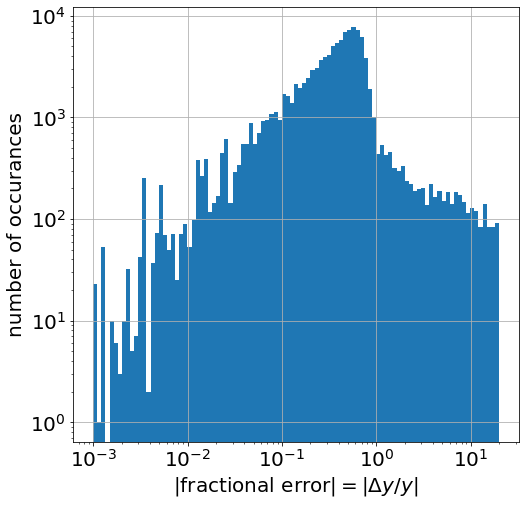

In [85]:
# Error distribution 

FEN = np.abs(final_data_predictions - y_lables_test_data)
FED = np.abs(y_lables_test_data)
FE = FEN.divide(FED)
logbins = np.logspace(-3,1.3,100)
ax = FE.hist(bins=logbins, figsize=(8,8))
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("|fractional error|$ = |\Delta y / y |$",size=20)
plt.xticks(fontsize=20)
plt.ylabel("number of occurances",size=20)
plt.yticks(fontsize=20)
plt.show()
